In [1]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper functions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Use inline so our visualizations display in notebook
%matplotlib inline

## Main Steps when building a Machine Learning Model. 
1. Inspect and explore data.
2. Select and engineer features.
3. Build and train model.
4. Evaluate model.

# #1 Inspect and explore data.
* Load titanic data
* Visualize all the data using sns.pairplot
* Check for null values

In [2]:
# Load in the titanic data set.
df = pd.read_csv('data/titanic.csv')
df.columns = df.columns.str.strip()

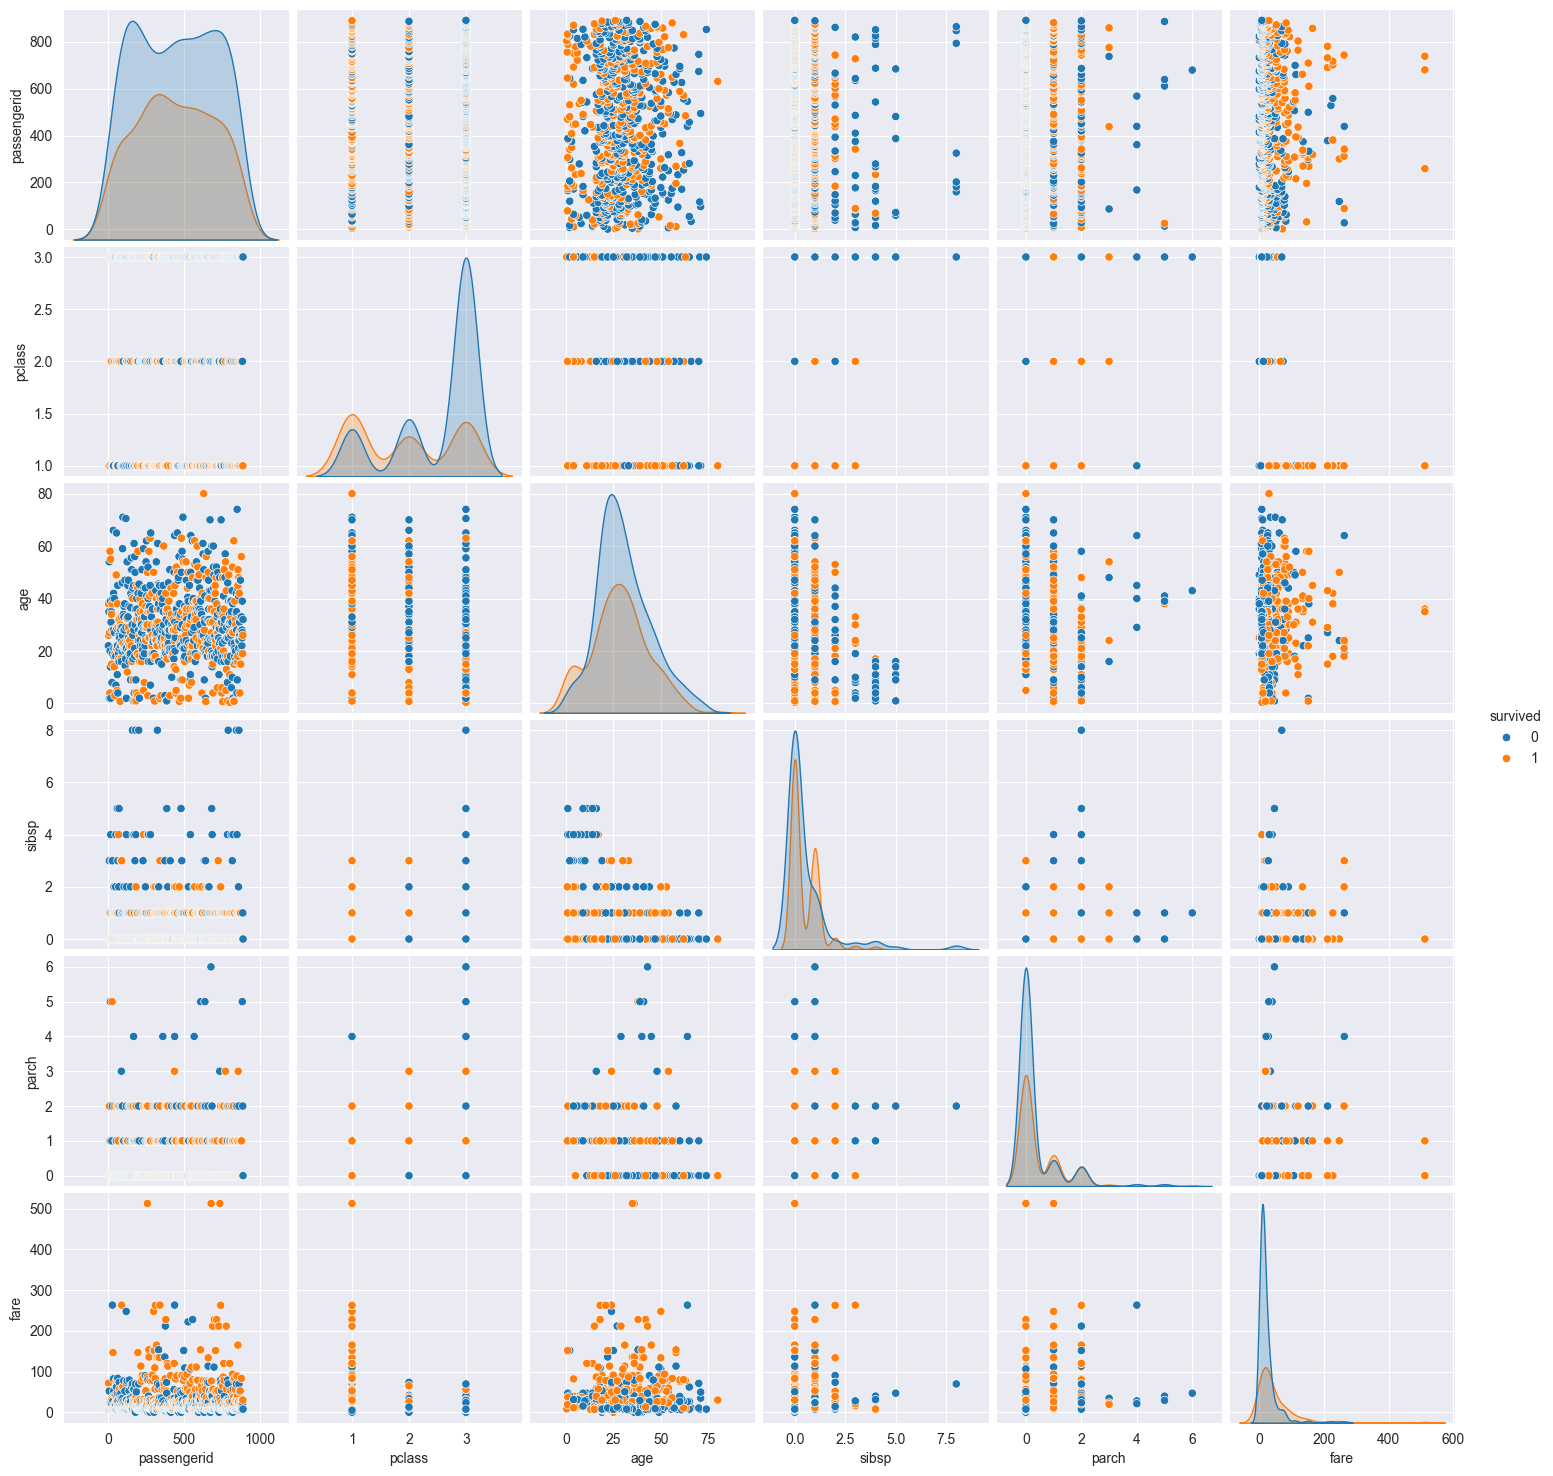

In [3]:
# Visualize all the data using sns.pairplot
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df[numerical_cols], hue='survived')
plt.show()

In [4]:
# Check for null values
null_counts = df.isnull().sum()
print("Null Values in Each Column:\n", null_counts)

Null Values in Each Column:
 passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64


# #2 Select and engineer features.
1. Fill age null values with -999
1. Convert to numerical values if need be by using `pd.get_dummies()`
1. Create a list of the features you are going to use.  In this case use as many or as little as you would like.
1. Define our `X` and `y`
1. Split our data into trainig and testing sets.

In [5]:
# Fill age null values with -999
df['age'] = df['age'].fillna(-999)

In [6]:
# 1. Convert to numerical values if need be by using `pd.get_dummies()`
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

In [7]:
# 2. Create a list of the features we are going to use.
selected_features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']

In [8]:
# Define our `X` and `y`
X = df[selected_features]
y = df['survived']

In [9]:
# Split our data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Length of our Training data: {len(X_train)} \nLength of our Testing data: {len(X_test)}')

Length of our Training data: 712 
Length of our Testing data: 179


# #3 Build and train model.
1. For our first pass, initialize our model with `max_depth=2`.
2. Fit our model with our training data. 
3. Make predictions of our testing data. 
4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
    * To calculate auc score you have to get the predicted probabilites for the Survived class using `model.predict_proba(X_test)[:,1]`
5. Visualize our Decision Tree using provided code. 


In [10]:
# For our first pass, initialize our model with `max_depth=2`.

model = DecisionTreeClassifier(max_depth=2, random_state=42)

In [11]:
# Fit our model with our training data. 

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [12]:
# Make predictions of our testing data. 

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # For AUC score

In [13]:
# 4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Keep only the proba for True
y_pred_proba = y_pred_proba[:, 1]

# Compute auc score
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.765363
Precision Score: 0.900000
Recall Score: 0.486486
F1 Score: 0.631579
AUC Score: 0.847362


# Visualize your tree

# Picking the right parameters...

# Parameter tuning of your Decision Tree using GridSearch or RandomizedSearch

### For assistance on this, look at Steves TA Tips code in `TA-Tips/random_forest_tuning.ipynb`


1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Visualize your best tree.
1. Which feature was your most important feature?

```python
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
```


[Tips on how to customize / set the paramters in the decision tree.](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)

In [14]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search.from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [15]:
# 1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
grid_search_cv = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

In [16]:
# 1. Fit your GridSearchCV with your training data. 
grid_search_cv.fit(X_train, y_train) 
print(grid_search_cv.best_estimator_) 

DecisionTreeClassifier(max_depth=6, min_samples_split=5, random_state=42)


In [17]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print("Best Parameters:", grid_search_cv.best_params_)

Best Parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [18]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you the best tree
model = grid_search_cv.best_estimator_

# Now let's evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.815642
Precision Score: 0.847458
Recall Score: 0.675676
F1 Score: 0.751880
AUC Score: 0.852252


In [19]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
5,0.502641,sex_male
0,0.179576,pclass
4,0.170897,fare
2,0.066675,sibsp
1,0.055441,age
7,0.013709,embarked_S
3,0.011060,parch
6,0.000000,embarked_Q


# Now onto Random Forests...
Were going to do the same with, but this time with a random forest. Remeber... Repetition is the father of learning.

1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Which feature was your most important feature?


# Parameters of the Random Forest Classifier

```python
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
```

In [20]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
params = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [4, 6, 8],          # Depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum samples needed to split a node
}

In [21]:
# 1. Initalize your GridSearchCV or RandomizedSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
grid_search_cv = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=params,
    cv=5,
    scoring='accuracy'  # Replace 'accuracy' with 'precision', 'recall', 'f1', or 'roc_auc' if preferred
)

In [22]:
# 1. Fit your GridSearchCV with your training data. 
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [23]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print("Best Parameters:", grid_search_cv.best_params_)

Best Parameters: {'max_depth': 6, 'min_samples_split': 10, 'n_estimators': 100}


In [24]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you tree that has the highest f1-score. 
model = grid_search_cv.best_estimator_


# Now let's evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test, y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.815642
Precision Score: 0.825397
Recall Score: 0.702703
F1 Score: 0.759124
AUC Score: 0.894015


# Build a random forest using the ny-vs-sf-housing.csv data. 
* Your target variable, aka the column you are trying to predict, aka your `y` variable is `in_sf`. 
* Can you get an accuracy above %88.8889?
* What was your most important feature?


In [26]:
df = pd.read_csv('data/ny-vs-sf-houses.csv')
df.head()

sf_nulls = df.isnull().sum()
print(sf_nulls)

in_sf             0
beds              0
bath              0
price             0
year_built        0
sqft              0
price_per_sqft    0
elevation         0
dtype: int64


In [31]:
# BUILD, TRAIN, AND EVAULATE A RANDOM FOREST MODEL BELOW.
selected_features = ['beds','bath','price','year_built','sqft','price_per_sqft','elevation']
X = df[selected_features]
y = df['in_sf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}")

Accuracy Score: 0.9192
Precision Score: 0.9138
Recall Score: 0.9464
F1 Score: 0.9298
AUC Score: 0.9653


In [32]:
feature_imp = pd.Series(model.feature_importances_,index=selected_features).sort_values(ascending=False)
feature_imp

elevation         0.345817
price_per_sqft    0.234627
price             0.126350
sqft              0.110112
year_built        0.107610
beds              0.046512
bath              0.028973
dtype: float64

# Awesome difficult extra credit below:
Build a classifier using the adult_income.csv data.  
* The target variable is 'class'
* Start with just using these features `selected_features = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']`
* You have to include the pos_label in your precision, recall, and f1 scores. It just tells the classifier which one is the posotive label.  I provided the proper way below.

* See if you can get above 50% f1 score.  
* See some [super tricks and tips here](https://www.kaggle.com/code/jieyima/income-classification-model)

In [61]:
df = pd.read_csv('data/adult_income.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [62]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class'],
      dtype='object')

In [63]:
income_nulls = df.isnull().sum()
print(income_nulls)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
class             0
dtype: int64


In [64]:
income_duplicates = df.duplicated().sum()
print(f'Duplicates: {income_duplicates}')

Duplicates: 24


In [65]:
df = df.drop_duplicates()

In [66]:
df['class'] = df['class'].str.strip()

# Feature engineering: adding new interaction features
df['age_hours_interaction'] = df['age'] * df['hours_per_week']
df['capital_net'] = df['capital_gain'] - df['capital_loss']

# Adding new features
selected_features = [
    'age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week', 'education_num',
    'age_hours_interaction', 'capital_net'
]

# Apply one-hot encoding on categorical columns if not already done
df = pd.get_dummies(df, columns=['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'], drop_first=True)

# Dynamically add all one-hot encoded columns for categorical variables
encoded_features = [col for col in df.columns if col.startswith(('workclass_', 'marital_status_', 'occupation_', 'relationship_', 'race_', 'sex_', 'native_country_'))]
selected_features += encoded_features

# Define X and y
X = df[selected_features]
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='>50K')
recall = recall_score(y_test, y_pred, pos_label='>50K')
f1 = f1_score(y_test, y_pred, pos_label='>50K')

print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy Score: 0.8593
Precision Score: 0.7569
Recall Score: 0.6313
F1 Score: 0.6884


In [59]:
feature_imp = pd.Series(model.feature_importances_,index=selected_features).sort_values(ascending=False)
feature_imp

marital_status_ Married-civ-spouse       0.221496
marital_status_ Never-married            0.123856
occupation_ Exec-managerial              0.084751
occupation_ Prof-specialty               0.080021
sex_ Male                                0.051913
relationship_ Own-child                  0.047678
relationship_ Not-in-family              0.045828
occupation_ Other-service                0.029792
relationship_ Unmarried                  0.023911
relationship_ Wife                       0.020769
workclass_ Self-emp-inc                  0.020073
occupation_ Sales                        0.019389
workclass_ Self-emp-not-inc              0.017003
workclass_ Private                       0.016149
occupation_ Craft-repair                 0.015989
race_ White                              0.014419
occupation_ Machine-op-inspct            0.014173
occupation_ Farming-fishing              0.013076
occupation_ Handlers-cleaners            0.012936
workclass_ Federal-gov                   0.012703


# F1 Score: .6884